SR search and analysis of high order Bessel functions

In [60]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


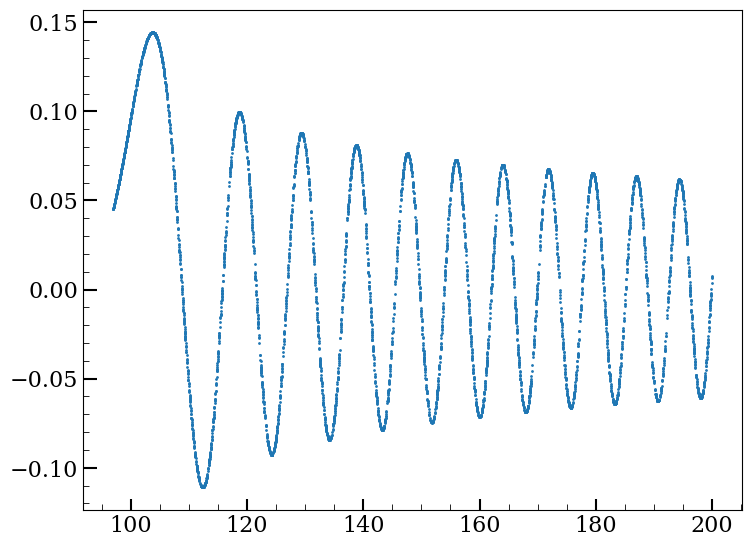

In [2]:
np.random.seed(42) #Keeping the seed for reproducibility

order = 100

x_train = np.sort(np.concatenate((np.random.uniform(97, 200, 5000), np.linspace(97, 100, 100))))
x_test = np.sort(np.concatenate((np.random.uniform(97, 200, 5000), np.linspace(97, 100, 100))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))

# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train = special.jv(order, x_train)
target_test = special.jv(order, x_test)

plt.scatter(x_train, target_train, s=1)

In [146]:
bessel_100_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,cos,sin,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 70,
    'max_time': 60*10,
    'n_threads': 12,
    'tournament_size': 3,
    'max_selection_pressure': 30,
    'initialization_method': 'btc'
}

Bessel_100 = Problem(f"Bessel function of order {order}", (x_train, target_train), (x_test, target_test), bessel_100_args)

In [147]:
Bessel_100.solve()
print(len(Bessel_100.solutions))

[0.06136414036154747, 5.0], 4709.60, (0.089167311788 + (0.007049583830 * ((-0.076063573360) * X1))), 0.00
[0.057926833629608154, 6.0], 4711.75, (0.009119454771 + ((-0.036777138710) * sin(((-0.779831707478) * X1)))), 0.00
[0.05598113685846329, 8.0], 4722.20, (0.082125045359 + (0.035577636212 * (((-0.013940691948) * X1) + sin((0.779599189758 * X1))))), 0.00
[0.05240541324019432, 9.0], 4727.05, (0.059351734817 + (0.083400018513 * cos((sin((0.413353025913 * X1)) - ((-0.018542338163) * X1))))), 0.00
[0.05098484084010124, 10.0], 4726.43, ((-0.016856985167) + (0.020599421114 * ((cos((0.212107867002 * X1)) / cos((0.018657956272 * X1))) ^ 2))), 0.00
[0.05071644112467766, 11.0], 4739.28, (0.080493599176 + ((-0.037861663848) * (sin((0.673015415668 * X1)) - (cos(((-0.769928872585) * X1)) - (0.012807039544 * X1))))), 0.00
[0.04841054603457451, 12.0], 4738.22, (0.039075732231 + (0.050576277077 * (cos((sin((0.410461485386 * X1)) - ((-0.018542338163) * X1))) - sin(((-0.780477821827) * X1))))), 0.00
[0

<Axes: title={'center': 'Bessel function of order 100 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

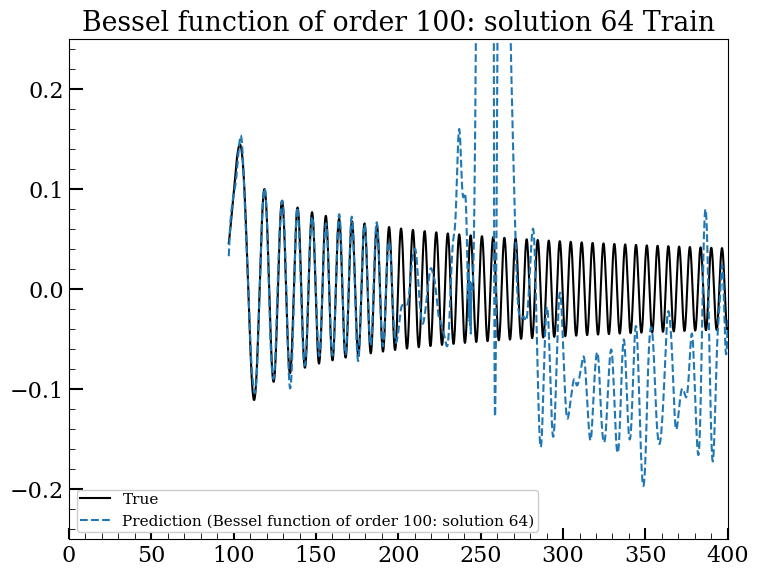

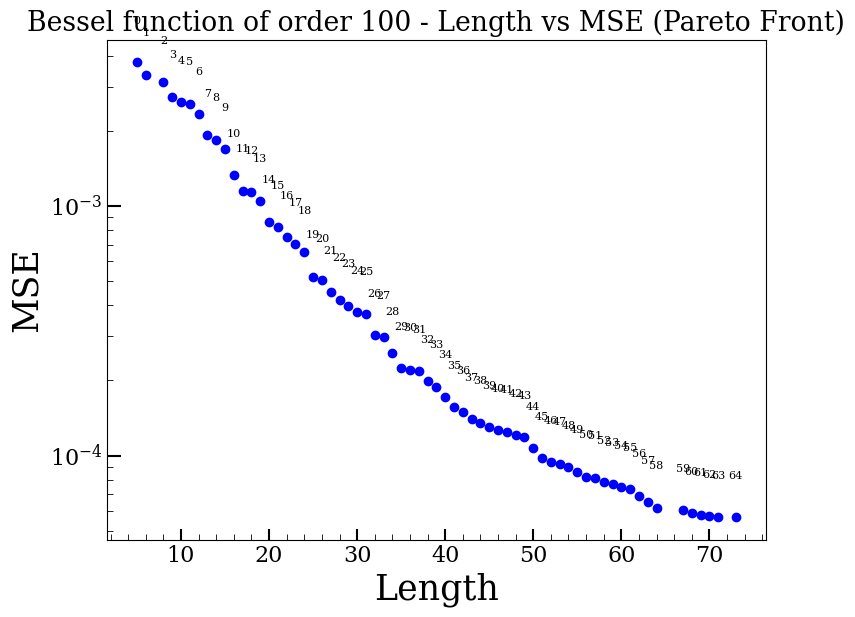

In [148]:
x_outside_train_range = np.sort(np.random.uniform(97, 400, 10000))
Bessel_100.solutions[-1].plot_results(x_outside_train_range, special.jv(order, x_outside_train_range))
plt.ylim(-0.25, 0.25)
plt.xlim(0, 400)
Bessel_100.plot_l_vs_mse()

<IPython.core.display.Math object>

{'b0': 0.023001300170999883, 'b1': 0.455668359995002, 'b2': 0.7599686384199913, 'b3': 0.6985616683959961, 'b4': 0.5598593354229706, 'b5': 0.01672089286099876, 'b6': 0.6124578118319732, 'b7': 0.2153485864400011, 'b8': 0.6598803997039795, 'b9': 0.7894129753110519, 'b10': 0.8425811529159546, 'b11': 0.01971808820999854, 'b12': 0.25134441256500395, 'b13': 0.019366534427000204, 'b14': 0.21275001764300328, 'b15': 0.24079984426501255, 'b16': 0.02460238106647239, 'b17': 0.2124398648739998, 'b18': 0.01842904090900177}


<Axes: title={'center': 'Fractional Error Comparison for Bessel Function (order=100)'}, xlabel='$x$', ylabel='Fractional Error'>

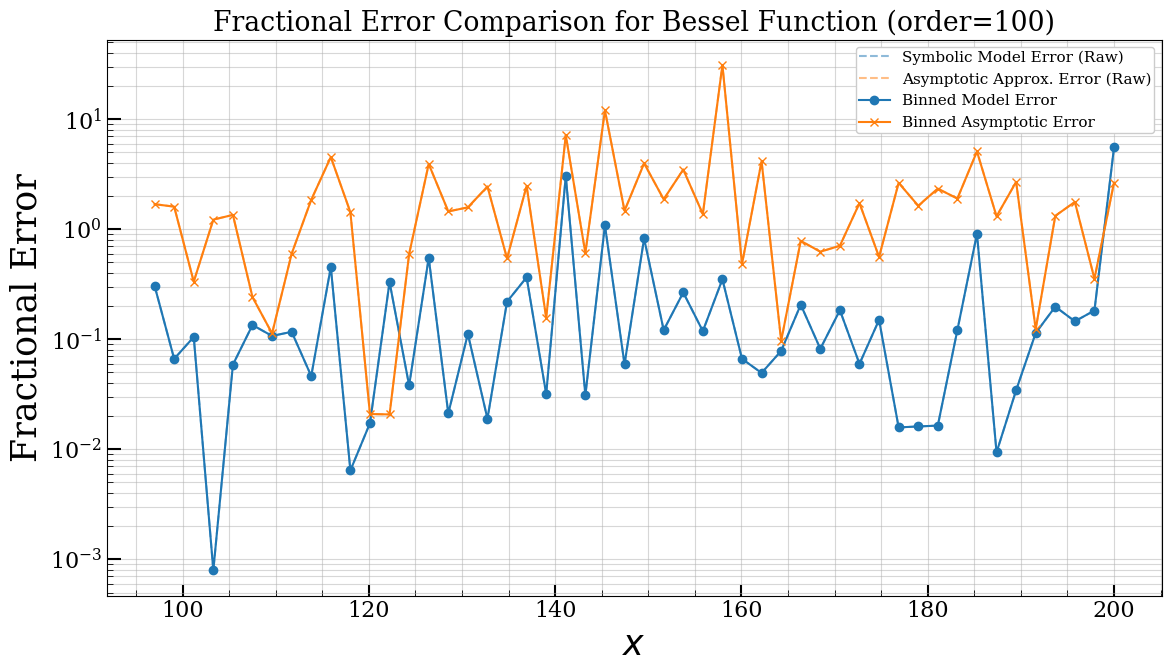

In [150]:
x_err = np.linspace(97, 200)
k=-1
Bessel_100.solutions[k].display_expression()
b_vals = Bessel_100.solutions[k].extract_and_format()[1]
print(b_vals)
Bessel_100.solutions[k].plot_error(x_err, order, kind='first', spherical=False, metric='fractional', smoothing = 'binned',num_bins=50,
                   show_approx=True, show_trunc=False, trunc_index=100 )
